In [32]:
import json
import pandas as pd 
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('s_cities.csv',index_col = 'Unnamed: 0')

#df = df.loc[df.geocode.isin([1712100, 2806701, 2925303,
 #                           2207702, 3119401, 2211001, 2408003])]

#le = LabelEncoder().fit(df['region'])
#region_labels = le.classes_
#df['region_codes'] = le.transform(df['region'])
#df['region_codes'] = df['region_codes'].astype('category')

df.head()

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,ep_ini,ep_end,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik
30,3304102,Porciúncula,2023,7.409684,0.744030,0.302994,2.455592,510.374892,0.592766,0.747429,202302,202316,14,33,RJ,3,2016,2020,2015-10-01,2020-11-01
8,2303501,Cascavel,2023,21.031014,0.447854,0.300026,1.492714,196.791047,0.330079,1.124154,202302,202339,37,23,CE,3,2017,2022,2016-10-01,2022-11-01
86,2311405,Quixeramobim,2023,18.372554,0.533369,0.303351,1.758256,466.403595,0.431255,0.930381,202302,202332,30,23,CE,3,2016,2022,2015-10-01,2022-11-01
88,2306801,Jaguaribara,2023,16.407407,0.744166,0.309970,2.400772,302.644966,0.583467,1.126158,202309,202325,16,23,CE,1,2017,2017,2016-10-01,2017-11-01
122,2305407,Icó,2023,13.682026,0.429828,0.300005,1.432734,87.125102,0.302034,1.434513,202302,202334,32,23,CE,2,2017,2022,2016-10-01,2022-11-01


In [34]:
def get_score(geocode, label = 'RMSE_SS'): 
    
    f = open(f'../scores/lstm/scores_{geocode}_DL.json')

    s = json.load(f) 
    
    return s[label]['TL vs DL - dengue'], s[label]['TL vs DL - chik']

In [35]:
def process_row(row):
    ss_dengue, ss_chik  = get_score(geocode=row['geocode'])
    return pd.Series({'ss_lstm_dengue':ss_dengue, 'ss_lstm_chik': ss_chik})

# Aplicando a função a cada linha do DataFrame e atribuindo os resultados às novas colunas
df[['ss_lstm_dengue', 'ss_lstm_chik']] = df.apply(process_row, axis=1)

In [36]:
def plot_dengue_chik(geocode):
    
    dfd = pd.read_csv(f'../data/dengue_{geocode}_cluster.csv', index_col = 'Unnamed: 0')

    dfd.index = pd.to_datetime(dfd.index)
    
    dfc = pd.read_csv(f'../data/chik_{geocode}_cluster.csv', index_col = 'Unnamed: 0')

    dfc.index = pd.to_datetime(dfc.index)
    
    
    fig, ax = plt.subplots()

    ax.plot(dfd[f'casos_{geocode}'] , label = 'dengue')
    
    ax.plot(dfc[f'casos_{geocode}'], label = 'chik')
    
    ax.grid()
    
    ax.legend()
    
    ax.set_title(f'Dengue and chik at {geocode}')

    plt.show()


    

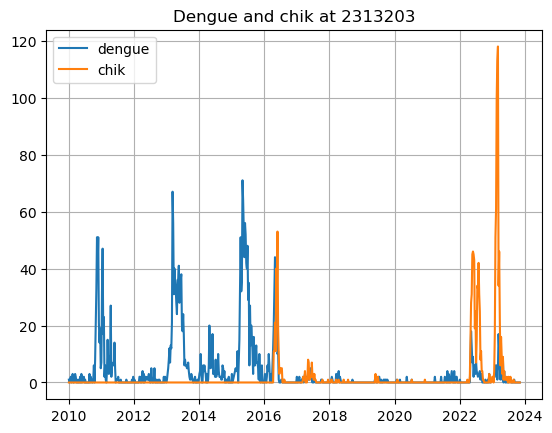

In [37]:
plot_dengue_chik(2313203)

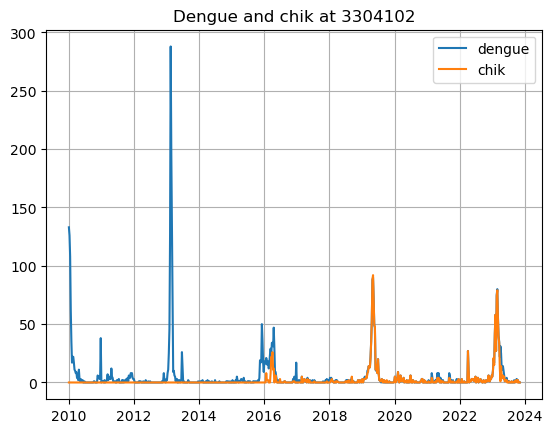

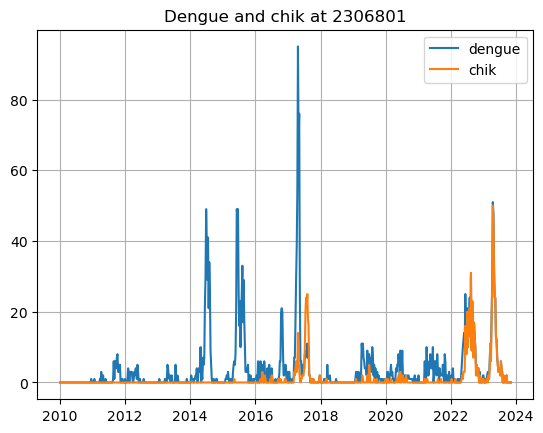

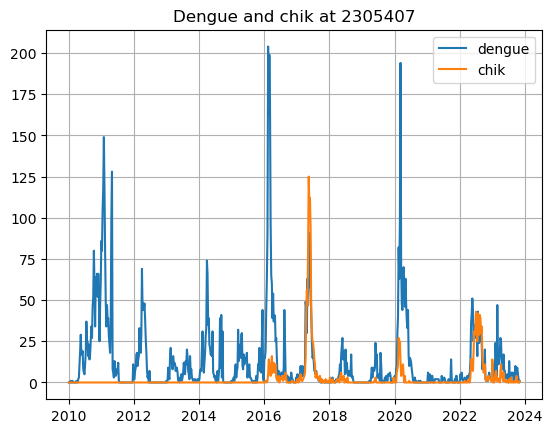

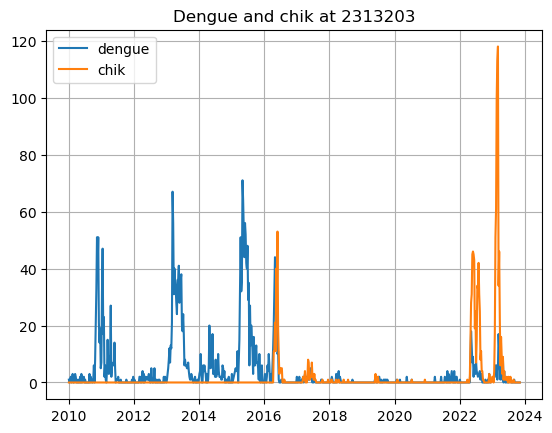

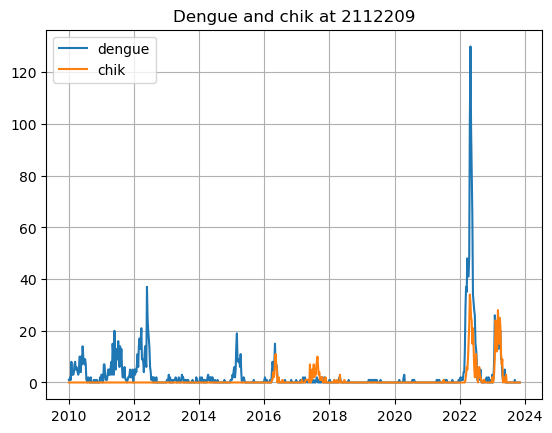

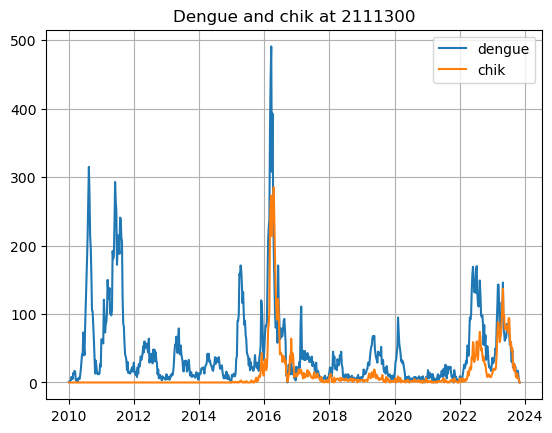

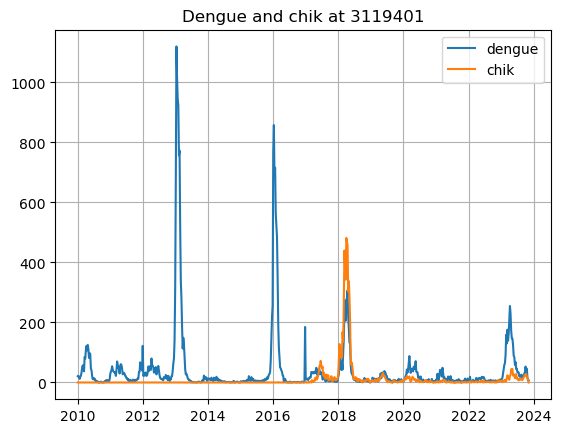

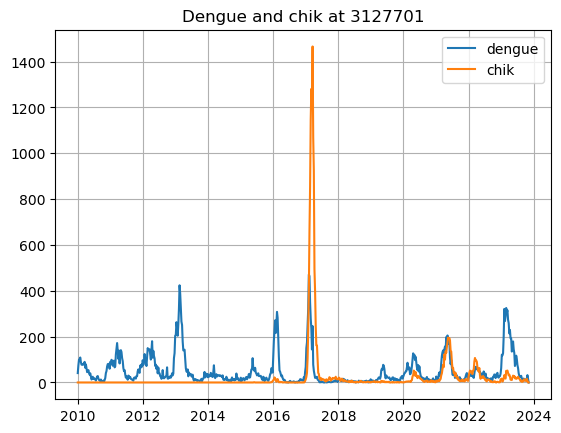

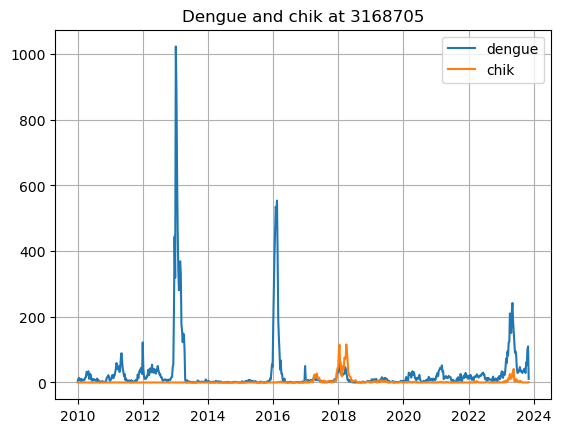

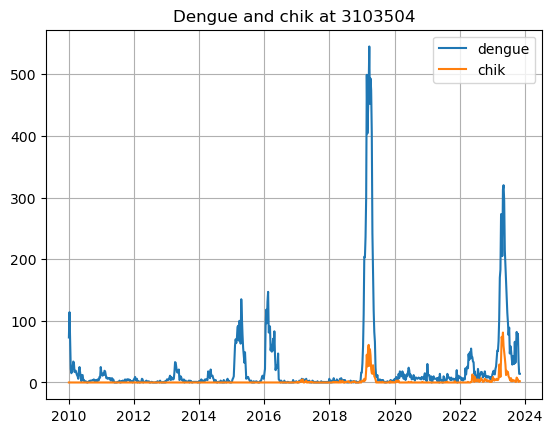

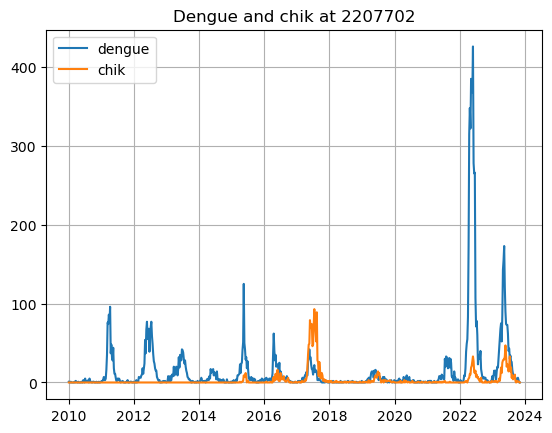

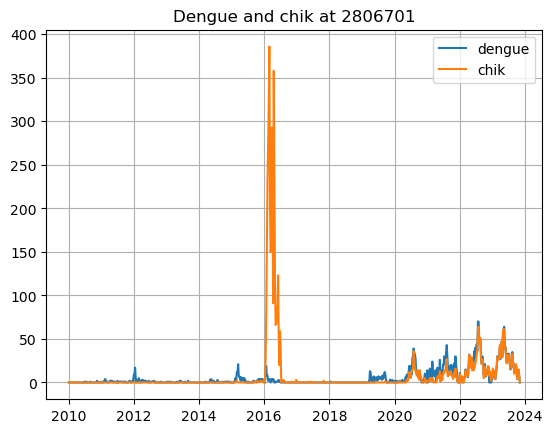

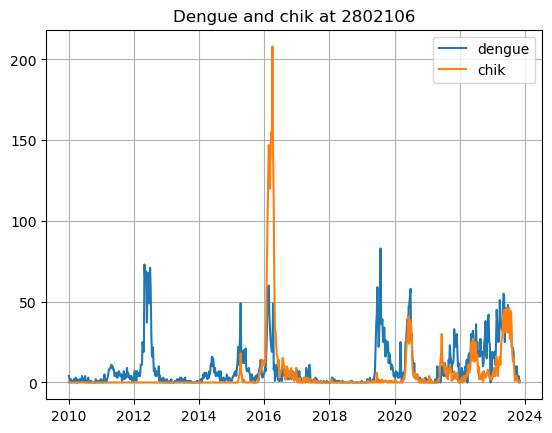

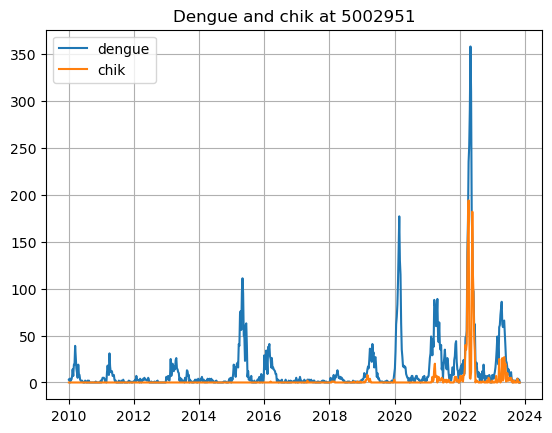

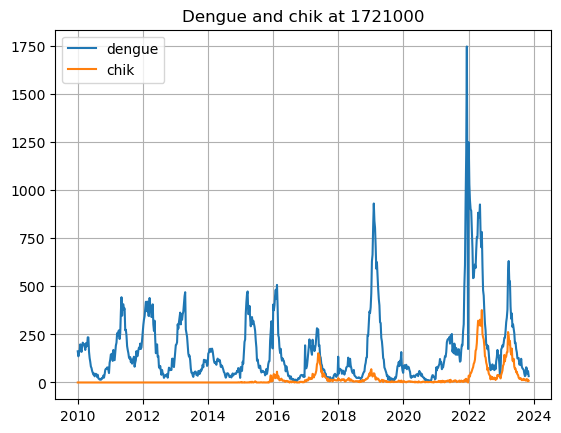

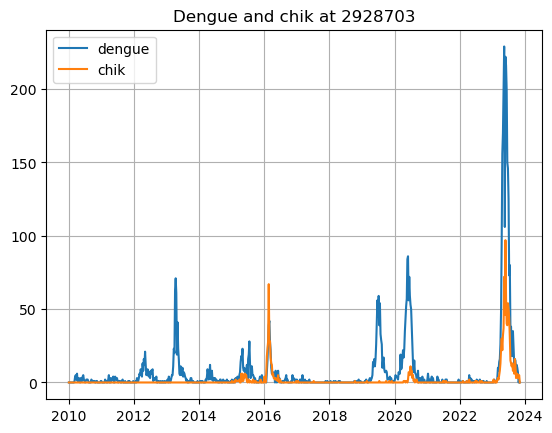

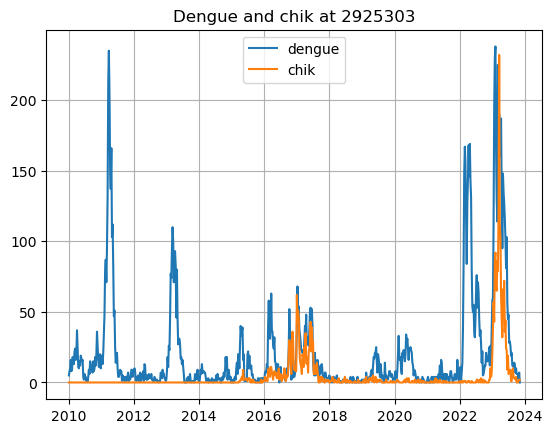

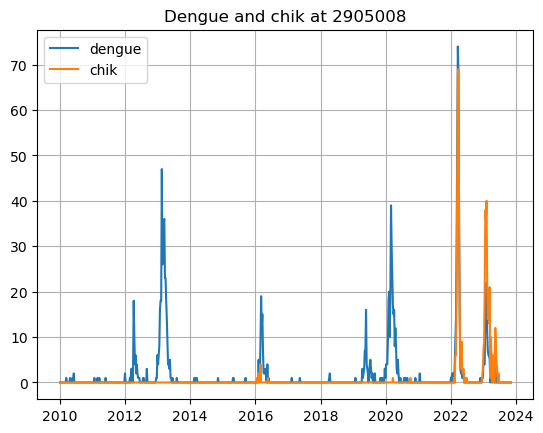

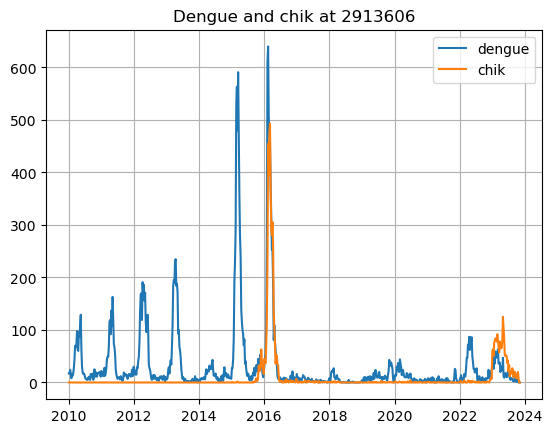

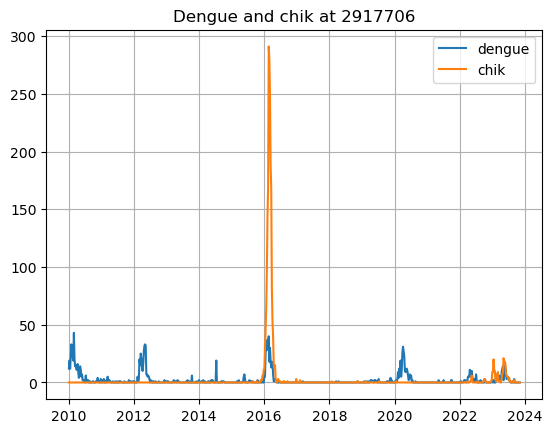

In [40]:
for g in df.loc[df.ss_lstm_dengue <0 ].geocode: 
    
    plot_dengue_chik(g)
    

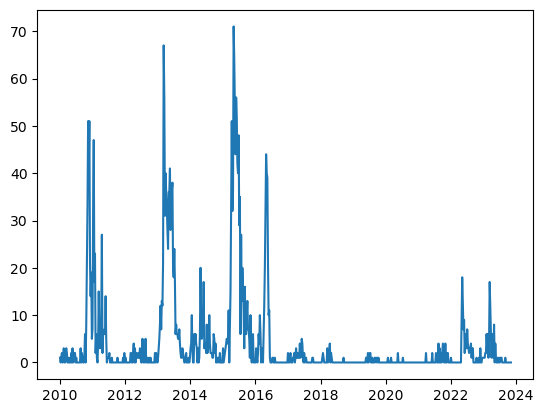

In [12]:
fig, ax = plt.subplots()

ax.plot(df.casos_2313203)

plt.show()

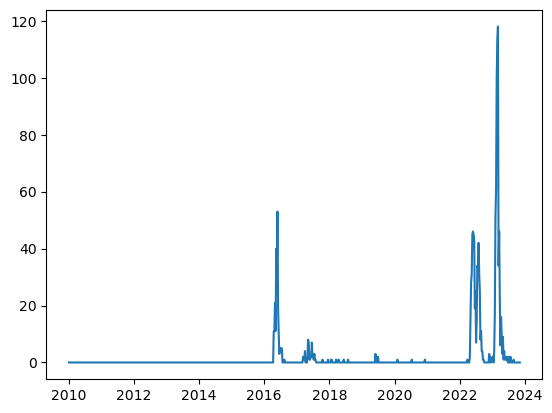

In [15]:
df = pd.read_csv('../data/chik_2313203_cluster.csv', index_col = 'Unnamed: 0')

df.index = pd.to_datetime(df.index)

fig,ax = plt.subplots()
ax.plot(df.casos_2313203)

plt.show()